In [10]:
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import spearmanr
import matplotlib.pyplot as plt

In [17]:
def create_regressor(hidden_layer_sizes):
    model = MLPRegressor(
        hidden_layer_sizes=hidden_layer_sizes,
        activation="relu",
        solver="adam",
        alpha=0.0001,
        batch_size="auto",
        max_iter=30,
        shuffle=True,
        random_state=1,
        verbose=True
    )
    return model

In [12]:
def plot_spearman(Y_test, y_pred):
    data = np.array((Y_test, y_pred)).T
    data = data[data[:, 0].argsort()]
    plt.scatter(data[:, 0], data[:, 1])
    plt.show()

In [13]:
X = np.load("./data/int_mapped_zero_padded/inputs.npy")
Y = np.load("./data/int_mapped_zero_padded/targets.npy")

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train, copy=False)
X_test = scaler.transform(X_test, copy=False)

In [15]:
sizes = [
    (128),
    # (1000, 256)
]

Iteration 1, loss = 22390.45938112
Iteration 2, loss = 3204.94994891
Iteration 3, loss = 68.34006780
Iteration 4, loss = 67.45776632
Iteration 5, loss = 66.68641906
Iteration 6, loss = 66.41890846
Iteration 7, loss = 66.09401721
Iteration 8, loss = 65.67616537
Iteration 9, loss = 65.44258850
Iteration 10, loss = 65.25656140
Iteration 11, loss = 64.90733495
Iteration 12, loss = 64.69182523
Iteration 13, loss = 64.64231505
Iteration 14, loss = 64.10227109
Iteration 15, loss = 64.00276319
Iteration 16, loss = 64.15655583
Iteration 17, loss = 63.64833099


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:709: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


128 0.2032128760233429


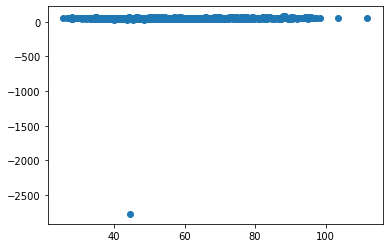

In [18]:
for size in sizes:
    model = create_regressor(size)
    model = model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    score, _ = spearmanr(Y_test, y_pred)
    
    print(size, score)
    plot_spearman(Y_test, y_pred)
    del model



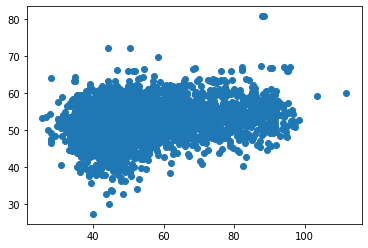

In [25]:
np.argmin(y_pred)
y_pred[875] = 30
plot_spearman(Y_test, y_pred)


0.018483004736262597


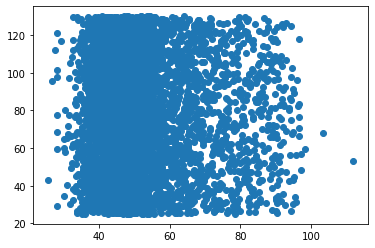

In [26]:
random_pred = np.random.uniform(25.0, 130.0, size=Y_test.shape)
score, _ = spearmanr(Y_test, random_pred)
print(score)
plot_spearman(Y_test, random_pred)
